# Import packages and load in the data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

def window_rms(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))


In [20]:
import numpy as np

#specify, what file nr to read
subject = "ralf"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = result
    
with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array = result
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta = np.load(file)

#specify, what file nr to read
subject = "ralf_2"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = np.concatenate([cheek_array,result], axis=0)
    
with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array =  np.concatenate([brow_array,result],axis=0)
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta =  np.concatenate([meta,np.load(file)],axis=1)
    
#specify, what file nr to read
subject = "egert"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = np.concatenate([cheek_array,result], axis=0)

with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array =  np.concatenate([brow_array,result],axis=0)

with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta = np.concatenate([meta,np.load(file)],axis=1)


## RMS

/home/egert/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


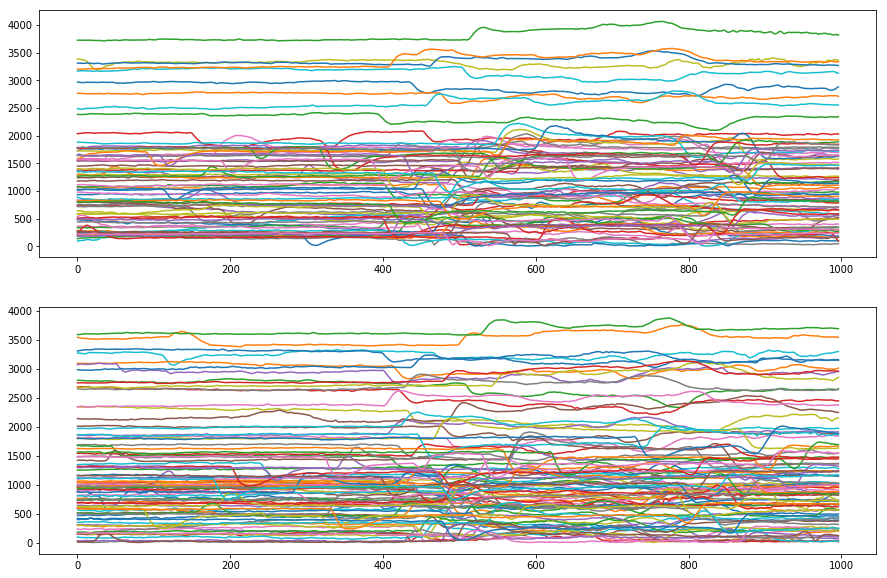

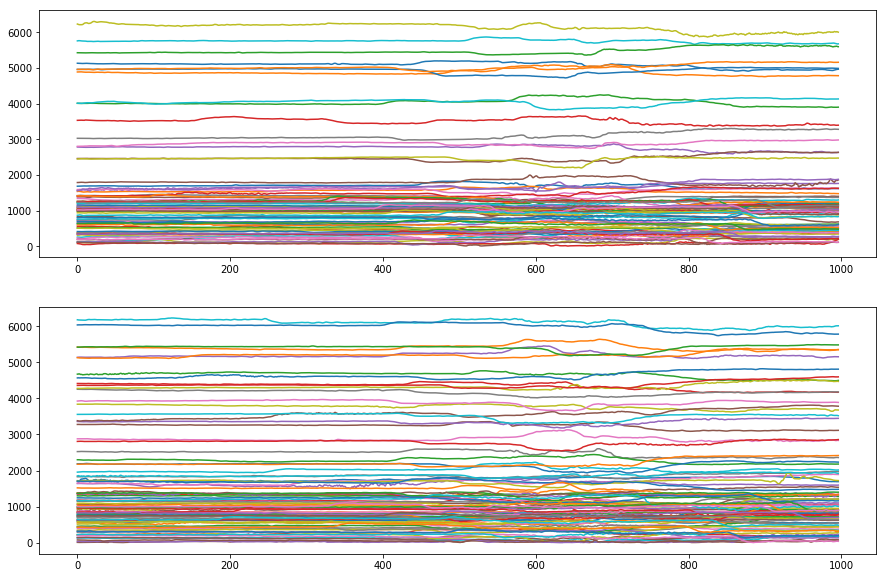

In [23]:
window_size = 5

cheek_array_rms = np.array([window_rms(ar,window_size) for ar in cheek_array])
cheek_array_rms.shape

brow_array_rms = np.array([window_rms(ar,window_size) for ar in brow_array])
cheek_array_rms.shape
fig, axes = plt.subplots(2,1, figsize=(15,10))

for ar in cheek_array_rms[meta[1],:]:
    axes[0].plot(ar)

for ar in cheek_array_rms[~meta[1],:]:
    axes[1].plot(ar)
fig.show()

fig, axes = plt.subplots(2,1, figsize=(15,10))
for ar in brow_array_rms[meta[1],:]:
    axes[0].plot(ar)

for ar in brow_array_rms[~meta[1],:]:
    axes[1].plot(ar)
fig.show()

## HMM for saying 'yes' or 'no' on cheek

In [66]:
from hmmlearn.hmm import GaussianHMM
yes_indexes = np.concatenate(np.argwhere(meta[1]))

X = np.concatenate(cheek_array_rms[yes_indexes])[:, np.newaxis]
lengths_shape = cheek_array_rms[yes_indexes].shape

lengths = (np.ones((lengths_shape[0],))*lengths_shape[1]).astype(int)

# 'yes' predictor hmm
gaussian_hmm_yes = GaussianHMM(n_components=10)

gaussian_hmm_yes.fit(X, lengths=lengths)

###################
X = np.concatenate(cheek_array_rms[~yes_indexes])[:, np.newaxis]
lengths_shape = cheek_array_rms[~yes_indexes].shape

lengths = (np.ones((lengths_shape[0],))*lengths_shape[1]).astype(int)

# 'no' predictor hmm
gaussian_hmm_no = GaussianHMM(n_components=10)

gaussian_hmm_no.fit(X, lengths=lengths)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

### Testing training set accuracy

In [79]:
predictions = []

for el in cheek_array_rms:
    score_for_no = gaussian_hmm_no.score(el[:, np.newaxis])
    score_for_yes = gaussian_hmm_yes.score(el[:, np.newaxis])
    if(score_for_no>score_for_yes):
        predictions.append(False)
    else: 
        predictions.append(True)
predictions = np.array(predictions)

In [82]:
from sklearn.metrics import accuracy_score

accuracy_score(meta[1], predictions)

0.5443786982248521

## HMM for 'lie' and 'truth' on cheek data

In [83]:
from hmmlearn.hmm import GaussianHMM
yes_indexes = np.concatenate(np.argwhere(meta[0]))

X = np.concatenate(cheek_array_rms[yes_indexes])[:, np.newaxis]
lengths_shape = cheek_array_rms[yes_indexes].shape

lengths = (np.ones((lengths_shape[0],))*lengths_shape[1]).astype(int)

# 'yes' predictor hmm
gaussian_hmm_yes = GaussianHMM(n_components=10)

gaussian_hmm_yes.fit(X, lengths=lengths)

###################
X = np.concatenate(cheek_array_rms[~yes_indexes])[:, np.newaxis]
lengths_shape = cheek_array_rms[~yes_indexes].shape

lengths = (np.ones((lengths_shape[0],))*lengths_shape[1]).astype(int)

# 'no' predictor hmm
gaussian_hmm_no = GaussianHMM(n_components=10)

gaussian_hmm_no.fit(X, lengths=lengths)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=10, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

### Testing training accuracy

In [85]:
from sklearn.metrics import accuracy_score

predictions = []

for el in cheek_array_rms:
    score_for_no = gaussian_hmm_no.score(el[:, np.newaxis])
    score_for_yes = gaussian_hmm_yes.score(el[:, np.newaxis])
    if(score_for_no>score_for_yes):
        predictions.append(False)
    else: 
        predictions.append(True)
predictions = np.array(predictions)

accuracy_score(meta[1], predictions)

0.4437869822485207